# Reconhecimento de nomes de instituições utilizando Inteligência Artificial

## Projeto PIBITI  

### Edital 18/2021-PROPPG-IFG

#### Estudante (bolsista): João Gabriel Grandoto Viana
#### Orientador: Waldeyr Mendes Cordeiro da Silva

## Parte 01 Coleta e tratamento de dados das fontes primárias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
url1 ='https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/scopus.csv'
url2 = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/webscience.csv'

scopus = pd.read_csv(url1)
web_of_science = pd.read_csv(url2, sep="\t" )

In [3]:
web_of_science.shape

(31, 67)

In [4]:
scopus.shape

(1276, 50)

In [5]:
#Renomeie as Colunas relacionadas porque estavam com os nomes diferentes
web_of_science.rename(columns={'Publication Year': 'Year'}, inplace = True)
web_of_science.rename(columns={'Article Title': 'Title'}, inplace = True)
web_of_science.rename(columns={'Publisher': 'Affiliations'}, inplace = True)

In [6]:
scopus["Affiliations"].head(10)

0    Instituto Federal de Goiás-IFG, Campus Goiânia...
1    Instituto Federal de Goiás (IFG), Aparecida de...
2    Instituto Federal de Educação, Ciência e Tecno...
3    Universidade Federal de Goiás – UFG, Rede Pró ...
4    Department of Agronomy, Universidade Federal R...
5    Institute for Hygiene and Public Health, Medic...
6    Department of Environmental Informatics, Helmh...
7    Grupo de Estudos em Geomática (GEO), Instituto...
8    Laboratory of Environmental Biotechnology and ...
9    Universidade Federal de Goiás (UFG), Instituto...
Name: Affiliations, dtype: object

In [7]:
web_of_science["Affiliations"].head(10)

0    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
1    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
2                        UNIV DO VALE DO RIO DOS SINOS
3    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
4                                             ELSEVIER
5                          UNIV FEDERAL CAMPINA GRANDE
6    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
7                PONTIFICIA UNIV CATOLICA PARANA-PUCPR
8                             UNIV FEDERAL SANTA MARIA
9                                      INST AGRONOMICO
Name: Affiliations, dtype: object

In [8]:
#juntando os dois dataframes
result = pd.concat([scopus, web_of_science])

In [9]:
nulos = result.loc[result['DOI'].isnull()] # somente registros sem DOI
nulos.index[0]
result = result.drop([nulos.index[0]])

In [10]:
total_artigos = result.shape[0]

In [11]:
result.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end',
       ...
       'Number of Pages', 'WoS Categories', 'Research Areas', 'IDS Number',
       'UT (Unique WOS ID)', 'Pubmed Id', 'Open Access Designations',
       'Highly Cited Status', 'Hot Paper Status', 'Date of Export'],
      dtype='object', length=105)

In [12]:
#Verificando duplicados na coluna DOI e apagando as linhas com DOI duplicado
result = result.drop_duplicates(subset=['DOI'], keep='first')
result.shape

(1162, 105)

In [13]:
duplicados_eliminados = total_artigos - result.shape[0]
duplicados_eliminados

144

In [14]:
# nomear os indices do tamanho do novo dataframe
index =[]  
for i in range(result.shape[0]): 
    index.append(i)
result.index = index

In [18]:
result[['DOI', 'Title', 'Affiliations']]

,DOI,Title,Affiliations
0,10.1016/j.nonrwa.2021.103406,Classical solution for a nonlinear hybrid syst...,"Instituto Federal de Goiás-IFG, Campus Goiânia..."
1,10.1007/978-3-030-79165-0_25,An Innovative Textile Product Proposal Based o...,"Instituto Federal de Goiás (IFG), Aparecida de..."
2,10.1590/1519-6984.245368,Detection of enteroparasites in foliar vegetab...,"Instituto Federal de Educação, Ciência e Tecno..."
3,10.1590/1519-6984.234476,"Phytochemical characterization, and antioxidan...","Universidade Federal de Goiás – UFG, Rede Pró ..."
4,10.1038/s41598-021-97854-8,Stability analysis of reference genes for RT-q...,"Department of Agronomy, Universidade Federal R..."
...,...,...,...
1157,10.31977/grirfi.v16i2.774,HUMAN RIGHTS: FROM THE UNIFORMITY OF THE SPECI...,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF..."
1158,10.1590/S0101-31732015000400002,PRESENTATION OF THE DOSSIER ROUSSEAU,UNESP-MARILIA
1159,10.1590/S1415-43662014000400013,Physiological quality of soybean seeds stored ...,UNIV FEDERAL CAMPINA GRANDE
1160,10.1590/S0034-89102010005000053,Ethics in the publication of studies on human ...,REVISTA DE SAUDE PUBLICA


In [ ]:
result[['DOI','Affiliations']].to_csv("dados_para_label.tsv", sep = "\t", index=False)

## Parte 02 - Tratamento dos dados etiquetados

Os dados slecionados foram etiquetados manualmente e salvos no dataset [dados com label](https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv)

In [5]:
url = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv'
dataset = pd.read_csv(url, sep="," )
dataset

,DOI,Title,Year,Affiliations,Campus,Institution
0,10.1016/j.nonrwa.2021.103406,Classical solution for a nonlinear hybrid syst...,2022,"Instituto Federal de Goiás-IFG, Campus Goiânia...",Goiânia,Instituto Federal de Goiás
1,10.1007/978-3-030-79165-0_25,An Innovative Textile Product Proposal Based o...,2022,"Instituto Federal de Goiás (IFG), Aparecida de...",Aparecida de Goiânia,Instituto Federal de Goiás
2,10.1590/1519-6984.245368,Detection of enteroparasites in foliar vegetab...,2022,"Instituto Federal de Educação, Ciência e Tecno...",Aparecida de Goiânia,Instituto Federal de Goiás
3,10.1590/1519-6984.234476,"Phytochemical characterization, and antioxidan...",2022,"Universidade Federal de Goiás – UFG, Rede Pró ...",Goiânia,Instituto Federal de Goiás
4,10.1038/s41598-021-97854-8,Stability analysis of reference genes for RT-q...,2021,"Department of Agronomy, Universidade Federal R...",Águas Lindas,Instituto Federal de Goiás
...,...,...,...,...,...,...
1157,10.31977/grirfi.v16i2.774,HUMAN RIGHTS: FROM THE UNIFORMITY OF THE SPECI...,2017,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF...",Bahia,Universidade Federal Reconcavo
1158,10.1590/S0101-31732015000400002,PRESENTATION OF THE DOSSIER ROUSSEAU,2015,UNESP-MARILIA,Marilia,UNESP
1159,10.1590/S1415-43662014000400013,Physiological quality of soybean seeds stored ...,2014,UNIV FEDERAL CAMPINA GRANDE,Campina Grande,Universidade Federal Campina Grande
1160,10.1590/S0034-89102010005000053,Ethics in the publication of studies on human ...,2011,REVISTA DE SAUDE PUBLICA,Brasil,Revista Saude Publica


### Separando o dataset em treino e teste

In [50]:
train_dataset = dataset.sample(frac = 0.9, random_state = 25)
test_dataset  = dataset.drop(train_dataset.index)

In [51]:
train_dataset.shape

(1046, 6)

In [52]:
test_dataset.shape

(116, 6)

# Classificação de texto [prova de conceito]

## Classificação

Em aprendizado de máquina, a classificação é a tarefa de agrupamento dos dados em diferentes classes, grupos ou partes. 

Por exemplo, se tomarmos os dados de vitórias, empates ou derrotas de um jogador de bilhar ao longo do tempo, podemos classificá-lo em um dado período como "em forma" ou "fora de forma" de acordo com seu desempenho. Uma vez que o modelo aprende a classificar com este jogador, é possível aplicar o mesmo modelo a outros jogadores de bilhar.

### Classificação binária

É o processo de classificação no qual elementos de um conjunto de dados são classificados em 2 classes. Um dos exemplos mais recorrentes é a classificação de e-mails como "*spam*" ou "não *spam*" com base em palavras-chave. A partir de um conjunto de textos de e-mail previamente etiquetados como *spam* ou não, constrói-se um modelo capaz de reconhecer características do texto e separar o texto no conjunto *spam* ou não *spam*. Uma vez construído o modelo, ele pode ser aplicado a qualquer outro texto para classificá-lo como *spam* ou não.

In [1]:
#! pip install nltk

In [48]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/waldeyr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
stopwords.words('portuguese')[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [50]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [51]:
stopwords.words('german')[:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [52]:
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [53]:
palavrasIgnoradas = \
    stopwords.words('portuguese') + \
    stopwords.words('english') + \
    stopwords.words('german') + \
    stopwords.words('spanish')

In [54]:
import random
random.sample(palavrasIgnoradas, 10)

['nor',
 'there',
 'because',
 'les',
 'teria',
 'isto',
 'da',
 'seas',
 'dass',
 'fôramos']

### Dataset com dados etiquetados (apredizado supervisionado)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

In [56]:
url = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv'
dataset = pd.read_csv(url, sep="," )

In [57]:
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution
153,10.1016/j.jclepro.2020.121443,Bio-acidification and enhanced crusting as an ...,2020,"LEAF, Instituto Superior de Agronomia, Univers...",Inhumas,Instituto Federal de Goiás
654,10.1007/s00603-015-0839-2,Steady-State Creep of Rock Salt: Improved Appr...,2015,"IfG, Institut für Gebirgsmechanik GmbH, Leipzi...",Germany,Institut für Gebirgsmechanik GmbH
1086,10.1111/j.1365-246X.2007.03580.x,Fault interactions in the Sea of Marmara pull-...,2007,"Laboratoire de Tectonique, IPGP, CNRS-UMR 7578...",Paris,L'Institut Français de Géopolitique


In [65]:
dataset['IFG'] = dataset['Institution'].apply(lambda x: 1 if str(x).strip() == "Instituto Federal de Goiás" else 0)

In [66]:
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution,IFG
231,10.1038/s41598-019-49263-1,Dissemination prevention of antibiotic resista...,2019,"Karlsruhe Institute of Technology (KIT), Insti...",Eggenstein-Leopoldshafen,Institute of Functional Interfaces,0
405,10.1109/TLA.2018.8358662,Method for Optimized Analysis of Electrical Te...,2018,"Enel, EMC/UFG, IFG, Goiania, Brazil; IF Goiano...",Trindade,Instituto Federal Goiano,0
61,10.1590/2179-10742021V20I1874,Mathematical Analysis and Improvement of the M...,2021,"Universidade Federal de Goiás-UFG, Goiânia, Go...",Goiânia,Instituto Federal de Goiás,1


In [67]:
X, y = dataset['Affiliations'], dataset['IFG']
X.shape, y.shape

((1162,), (1162,))

In [68]:
X

0       Instituto Federal de Goiás-IFG, Campus Goiânia...
1       Instituto Federal de Goiás (IFG), Aparecida de...
2       Instituto Federal de Educação, Ciência e Tecno...
3       Universidade Federal de Goiás – UFG, Rede Pró ...
4       Department of Agronomy, Universidade Federal R...
                              ...                        
1157    UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF...
1158                                        UNESP-MARILIA
1159                          UNIV FEDERAL CAMPINA GRANDE
1160                             REVISTA DE SAUDE PUBLICA
1161                                      UNIV NOVE JULHO
Name: Affiliations, Length: 1162, dtype: object

#### Bag of Words

É uma matriz esparsa com a ocorrência ou não de um termo em cada texto ou documento.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    max_features = 1500, # vocabulário considera top max_features ordenadas por freq do termo no texto 
    min_df = 5, # ignorar termos com frequencia menor do que x, onde 0<=x<=1
    max_df = 0.7, # ignorar termos com frequencia maior do que x, onde 0<=x<=1
    stop_words = palavrasIgnoradas
)

In [62]:
vectorizer

CountVectorizer(max_df=0.7, max_features=1500, min_df=5,
                stop_words=['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em',
                            'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se',
                            'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
                            'ao', 'ele', 'das', 'à', 'seu', 'sua', ...])

In [64]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
X = vectorizer.fit_transform(X).toarray()

In [46]:
X.shape

(1162, 1033)

#### TFIDF (term frequency–inverse document frequency)

É uma medida estatística que almeja refletir a importância (peso) de um termo em um conjunto de documentos através de sua frequência.
O peso de um termo que ocorre em um documento é diretamente proporcional à sua frequência.
Quanto mais um termo aparece no conjunto de documentos, mais importante ele é.
Entretanto, quando o tamanho dos documentos varia muito, é natural que um termo possa aparecer mais. Por isso algum ajuste precisa ser feito a variedade. Termos como "do", "de" na língua portuguesa ou "the", "of" na língua inglesa tendem a aparecer mais que outros.

TFIDF procura resolver este problema multiplicando a frequência do termo pelo inverso da frequência do termo em um conjunto de textos.

$$ idf(t, D) = log\frac{N}{count(d~\in~D:t~\in~d)}$$

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

##### Separando o dataset em 2 partes (treino e teste)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

##### Criando e treinando o modelo com os dados de treino

In [56]:
from sklearn.linear_model import LogisticRegression
modeloRegressaoLogistica = LogisticRegression()
modeloRegressaoLogistica.fit(X_train, y_train)

LogisticRegression()

##### Testando o modelo com o conjunto de teste

In [57]:
predictions = modeloRegressaoLogistica.predict(X_test)

### Avaliação da classificação

Algumas métricas são utilizadas para avaliar o quão bom um modelo é capaz de classificar.

#### Acurácia

* True positive (TP): quando um elemento pertence a uma classe e o modelo diz que ele pertence.
* False positive (FP): quando o elemento não pertence a uma classe e o modelo diz que ele pertence;
* True negative (TN): quando um elemento não pertence a uma classe e o modelo diz que ele não pertence;
* False negative (FN): quando um elemento pertence a uma classe e o modelo diz que ele não pertence;
    
A acuária é obtida como se segue:
    
$$ acurária = \frac{TP + TN}{TP + FP + TN + FN} $$

A acurácia pode ser representada por uma matriz de confusão.

#### Precisão

A precisão é a métrica que indica qual a proporção de identificações positivas foi correta. Ou seja, entre todas as identificações positivas, em que proporção o modelo realmente acertou. A precisão é dada pela fórmula:

$$ Precisão = \frac{TP}{TP + FP} $$


#### Recall

O *recall* indica a proporção de verdadeiros positivos corretamente identificados. A fórmula para cacular o *recall* é dada por:

$$ Recall = \frac{TP}{TP + FN} $$


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[81  2]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.94      0.97      0.96        34

    accuracy                           0.97       117
   macro avg       0.97      0.97      0.97       117
weighted avg       0.97      0.97      0.97       117

0.9743589743589743


In [60]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Acurácia da classificação binária = {:0.3f}%'.format(accuracy*100))

True Positive(TP)  =  33
False Positive(FP) =  2
True Negative(TN)  =  81
False Negative(FN) =  1
Acurácia da classificação binária = 97.436%


In [70]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

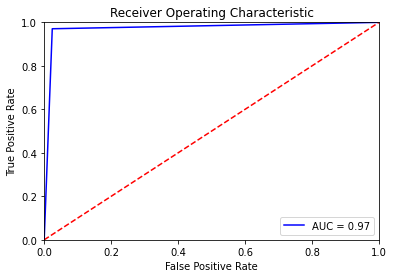

In [72]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Multiclassificação

In [116]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image 
from six import StringIO

In [96]:
url = "https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_multi_classe.csv"
df = pd.read_csv(url, delimiter=',')

In [97]:
df

,Institution,Affiliations
0,Aristotle University Greece,1st Department of Ophthalmology Aristotle Univ...
1,Aristotle University Greece,Aristotle Univ Thessaloniki Greece
2,Aristotle University Greece,Aristotle Univ Thessaloniki Thessaloniki Greece
3,Aristotle University Greece,Aristotle University of Thessaloniki Greece
4,Aristotle University Greece,Aristotle University of Thessaloniki Thessalon...
...,...,...
122935,Universidade Federal Reconcavo,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF..."
122936,UNESP,UNESP-MARILIA
122937,Universidade Federal Campina Grande,UNIV FEDERAL CAMPINA GRANDE
122938,Revista Saude Publica,REVISTA DE SAUDE PUBLICA


In [98]:
df['Affiliations'] = df['Affiliations'].apply( lambda x : str(x).lower() )

In [99]:
X, y = df['Affiliations'], df['Institution']
X.shape, y.shape

((122940,), (122940,))

In [100]:
X

0         1st department of ophthalmology aristotle univ...
1                        aristotle univ thessaloniki greece
2           aristotle univ thessaloniki thessaloniki greece
3               aristotle university of thessaloniki greece
4         aristotle university of thessaloniki thessalon...
                                ...                        
122935    univ fed reconcavo bahia, centro formacao prof...
122936                                        unesp-marilia
122937                          univ federal campina grande
122938                             revista de saude publica
122939                                      univ nove julho
Name: Affiliations, Length: 122940, dtype: object

In [101]:
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/waldeyr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
palavrasIgnoradas = \
    stopwords.words('portuguese') + \
    stopwords.words('english') + \
    stopwords.words('german') + \
    stopwords.words('spanish')

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    max_features = 1500, # vocabulário considera top max_features ordenadas por freq do termo no texto 
    min_df = 5, # ignorar termos com frequencia menor do que x, onde 0<=x<=1
    max_df = 0.7, # ignorar termos com frequencia maior do que x, onde 0<=x<=1
    stop_words = palavrasIgnoradas
)

In [104]:
vectorizer.fit_transform(X)

<122940x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 1014848 stored elements in Compressed Sparse Row format>

In [105]:
X = vectorizer.fit_transform(X).toarray()

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [110]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state=0)

In [111]:
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, random_state=0)

In [112]:
modelo = arvore.fit(X_treino, y_treino)

Populating the interactive namespace from numpy and matplotlib


[Text(869.5402916217673, 1037.7818181818182, '[0. 0. 0. ... 0. 0. 0.] <= 0.033\nentropy = 9.928\nsamples = 110646\nvalue = [1, 1, 1 ... 7, 4, 5]'),
 Text(539.8014884159484, 938.9454545454546, '[0. 0. 0. ... 0. 0. 0.] <= 0.079\nentropy = 11.204\nsamples = 48097\nvalue = [1, 1, 1 ... 7, 4, 5]'),
 Text(299.162109375, 840.1090909090909, '[0. 0. 0. ... 0. 0. 0.] <= 0.009\nentropy = 11.381\nsamples = 36603\nvalue = [1, 0, 1 ... 7, 4, 5]'),
 Text(153.8934536637931, 741.2727272727273, '[0. 0. 0. ... 0. 0. 0.] <= 0.15\nentropy = 11.332\nsamples = 25259\nvalue = [1, 0, 1 ... 7, 4, 5]'),
 Text(76.96551724137932, 642.4363636363637, '[0. 0. 0. ... 0. 0. 0.] <= 0.097\nentropy = 11.019\nsamples = 22029\nvalue = [1, 0, 1 ... 7, 4, 5]'),
 Text(38.48275862068966, 543.6, '[0. 0. 0. ... 0. 0. 0.] <= 0.02\nentropy = 10.996\nsamples = 20177\nvalue = [1, 0, 1 ... 0, 0, 5]'),
 Text(19.24137931034483, 444.76363636363635, '[0. 0. 0. ... 0. 0. 0.] <= 0.065\nentropy = 10.928\nsamples = 17386\nvalue = [0, 0, 1 ...

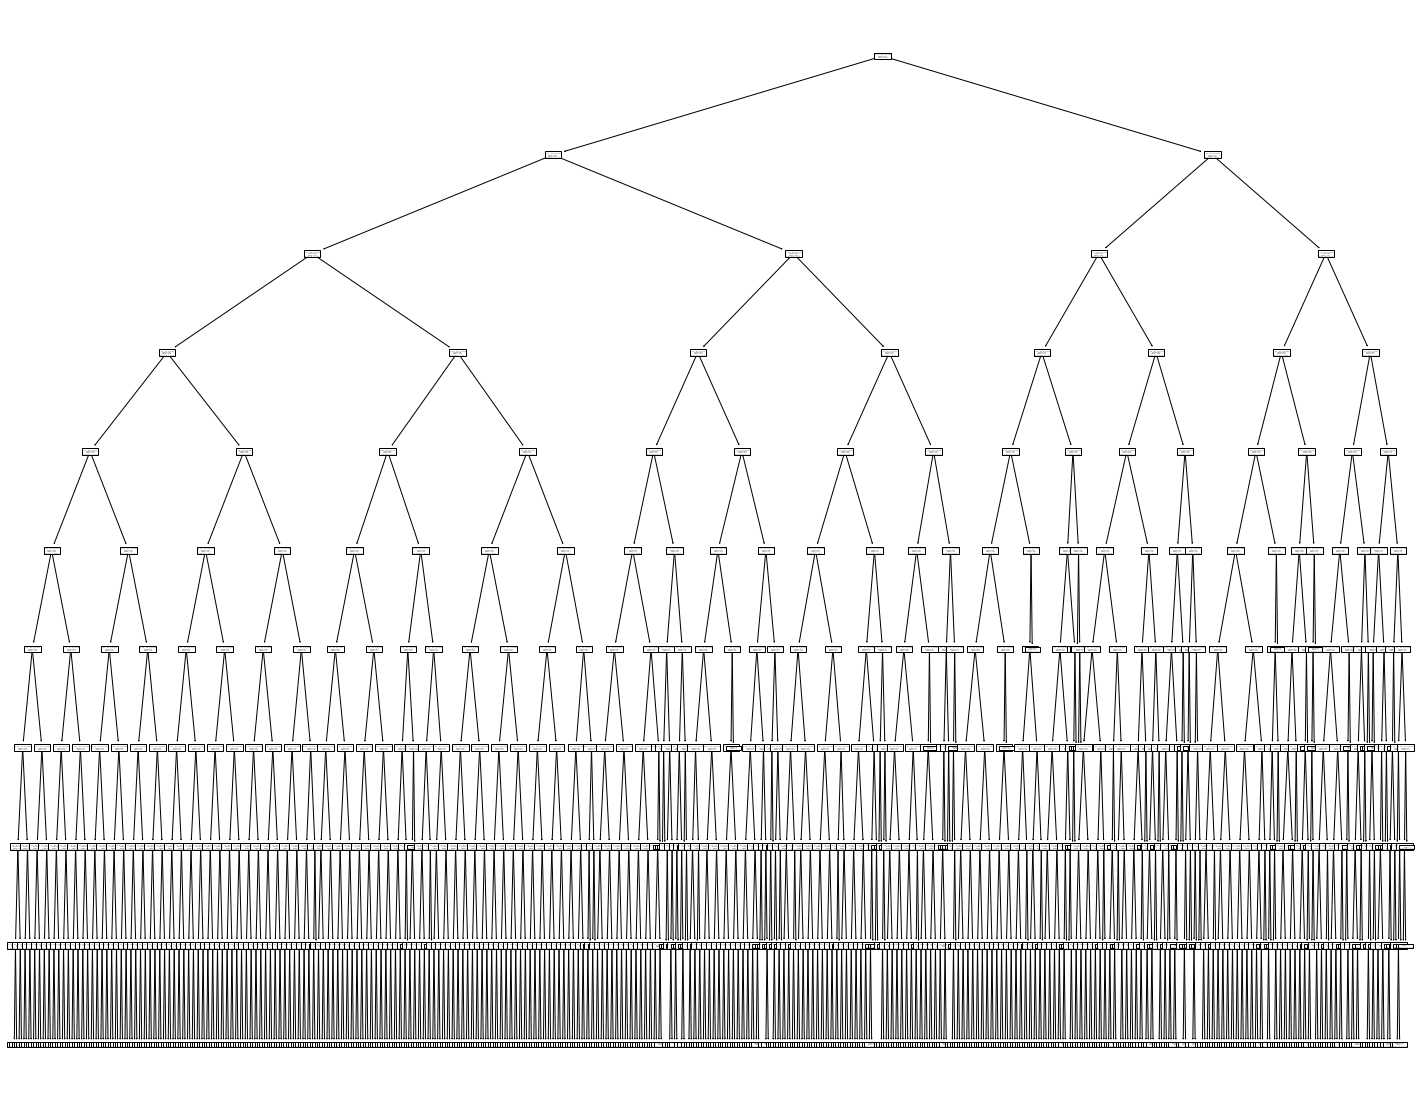

In [118]:
%pylab inline
pylab.figure(figsize=(25,20))
plot_tree(modelo, feature_names=X_treino)